In [6]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Resize, Normalize, PILToTensor
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import numpy as np

set_names = ["test", "validate", "test"]


In [70]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms import Compose, ToTensor, Resize, Normalize, PILToTensor, CenterCrop
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob


# standardTransform = Compose([ToTensor(), Resize([128, 128], antialias=True), Normalize(0.5, 0.5, 0.5)])
standardTransform = Compose([PILToTensor(), CenterCrop(192)])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class ADNIDataset(Dataset):  
	def __init__(self, img_data, transform=ToTensor()):
		self.transform = transform
		self.imgs = [self.transform(imgset[0]) for imgset in img_data]
		self.labels = [imgset[1] for imgset in img_data]
		
	def __len__(self):
		return len(self.imgs)
	
	def __getitem__(self, idx):
		return self.imgs[idx], self.labels[idx]

def load_images_from_directories(dirs, datasplit=0., verbose=False):
	"""Load images from data directory

	Args:
		dirs (_type_): _description_
	"""
	image_paths = []
	train_paths = []
	val_paths = []
	train_images = []
	val_images = []
	for dir in dirs:
		for filename in glob(dir[0], recursive=True):
			image_paths.append(filename)
	image_paths = sorted(image_paths)
	
	curr_patient = ""
	count = 0
	for ip in image_paths:
		patient_id = ip.split("/")[-1].split("_")[0]
		# print(patient_id)
		if (curr_patient != patient_id):
			curr_patient = patient_id
			count += 1
		if (datasplit != 0.):
			# print(patient_id)
			if (count % (round(1/datasplit)) == 0):
				count = 0
			if (count == 0):
				# print("val")
				val_paths.append(ip)
				img = Image.open(ip)
				val_images.append([img.copy(), dir[1]])
				img.close()
			else:
				# print("train")
				train_paths.append(ip)
				img = Image.open(ip)
				train_images.append([img.copy(), dir[1]])
				img.close()
		else:
			train_paths.append(ip)
			img = Image.open(ip)
			train_images.append([img.copy(), dir[1]])
			img.close()
   
	print("Set1: ", train_paths[:2])
	print("Set2: ", val_paths[:2])
			
	if verbose:
		for ip in image_paths[:10]:
			im = Image.open(ip)
			plt.figure()
			plt.imshow(im, cmap="gray")

	return train_images, val_images


def load_adni_images(datasplit = 0.2, verbose=False):
	"""Load oasis images from data directory provided

	Returns:
		[string, list[np.array]]: image paths and images
	"""
	train_dirs = []
	test_dirs = []

	base_dir = "C:/Users/Jun Khai/Documents/Uni/Year 5 Sem 2/PatternAnalysis-2023/recognition/45816967_ADNI_Vision_Transformer/"

	train_dirs.append((f'{base_dir}data/ADNI_AD_NC_2D/AD_NC/train/AD/*', 1))
	train_dirs.append((f'{base_dir}data/ADNI_AD_NC_2D/AD_NC/train/NC/*', 0))
	test_dirs.append((f'{base_dir}data/ADNI_AD_NC_2D/AD_NC/test/AD/*', 1))
	test_dirs.append((f'{base_dir}data/ADNI_AD_NC_2D/AD_NC/test/NC/*', 0))
		
	return load_images_from_directories(train_dirs, datasplit=datasplit, verbose=verbose), load_images_from_directories(test_dirs, datasplit=0, verbose=verbose)



In [71]:
from torch.utils.data import DataLoader

train_imgs, test_imgs = load_adni_images(verbose = False)
print(train_imgs[0][0])


['C:/Users/Jun Khai/Documents/Uni/Year 5 Sem 2/PatternAnalysis-2023/recognition/45816967_ADNI_Vision_Transformer/data/ADNI_AD_NC_2D/AD_NC/train/AD\\218391_78.jpeg', 'C:/Users/Jun Khai/Documents/Uni/Year 5 Sem 2/PatternAnalysis-2023/recognition/45816967_ADNI_Vision_Transformer/data/ADNI_AD_NC_2D/AD_NC/train/AD\\218391_79.jpeg', 'C:/Users/Jun Khai/Documents/Uni/Year 5 Sem 2/PatternAnalysis-2023/recognition/45816967_ADNI_Vision_Transformer/data/ADNI_AD_NC_2D/AD_NC/train/AD\\218391_80.jpeg', 'C:/Users/Jun Khai/Documents/Uni/Year 5 Sem 2/PatternAnalysis-2023/recognition/45816967_ADNI_Vision_Transformer/data/ADNI_AD_NC_2D/AD_NC/train/AD\\218391_81.jpeg', 'C:/Users/Jun Khai/Documents/Uni/Year 5 Sem 2/PatternAnalysis-2023/recognition/45816967_ADNI_Vision_Transformer/data/ADNI_AD_NC_2D/AD_NC/train/AD\\218391_82.jpeg', 'C:/Users/Jun Khai/Documents/Uni/Year 5 Sem 2/PatternAnalysis-2023/recognition/45816967_ADNI_Vision_Transformer/data/ADNI_AD_NC_2D/AD_NC/train/AD\\218391_83.jpeg', 'C:/Users/Jun K

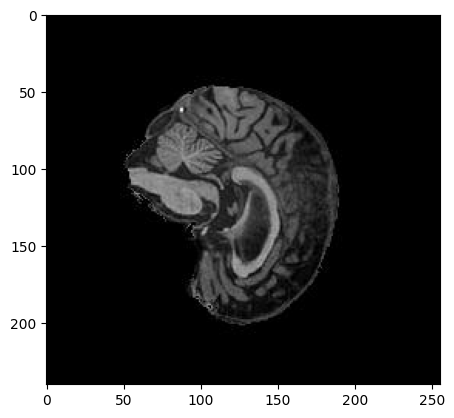

In [5]:
plt.imshow(train_imgs[0][0][0], cmap="gray")
plt.show()

# dataset = OASISDataset(imgs, standardTransform)
# plt.imshow(imgs[0], cmap = 'gray')
# plt.show()

# dataset = ADNIDataset(imgs, standardTransform)

# dl = DataLoader(dataset=dataset, batch_size=10, shuffle=False)
# nextimg = next(iter(dl))
# print(nextimg)
# for img in nextimg:
#   plt.imshow(imgs[0], cmap = 'gray')
#   plt.show()


In [73]:
print(np.array(train_imgs[0][0][0]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
train_set = ADNIDataset(train_imgs[0], transform=standardTransform)
val_set = ADNIDataset(train_imgs[1], transform=standardTransform)
test_set = ADNIDataset(test_imgs[0], transform=standardTransform)
# tr_imgs = [set[0] for set in train_imgs[0]]
# print(tr_imgs[0])
# tr_labels = [set[1] for set in train_imgs[0]]
# print(tr_labels[0])

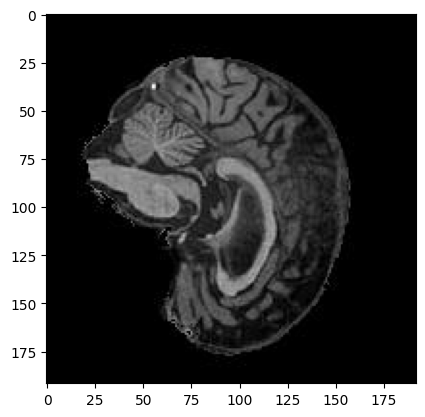

In [22]:
dl = DataLoader(train_set, batch_size=2)
nextimg = next(iter(dl))
# print(nextimg)
plt.imshow(nextimg[0][0][0], cmap="gray")
plt.show()


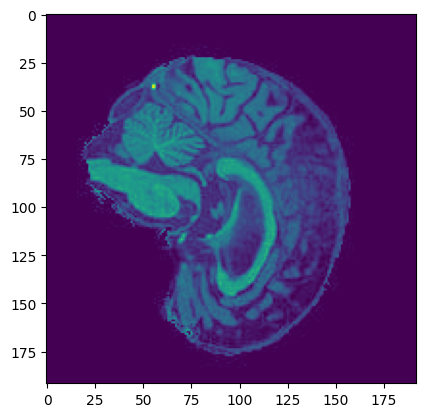

In [40]:
nextimg[0].shape
plt.imshow(nextimg[0][0][0])
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


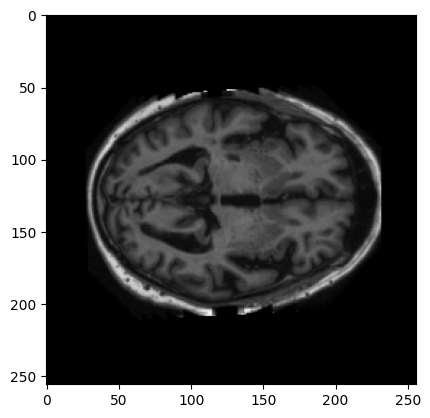

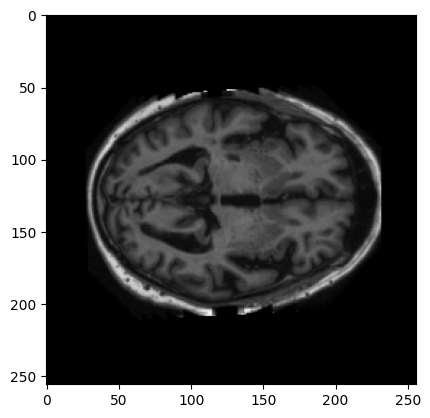

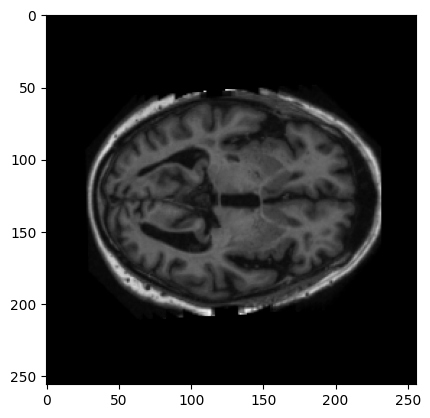

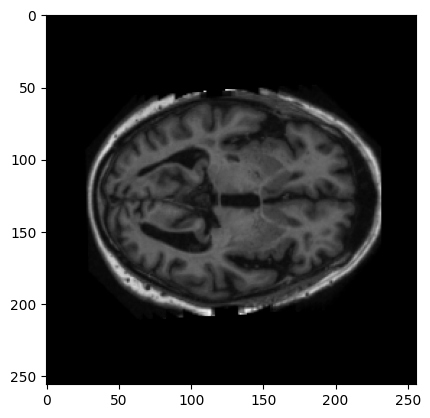

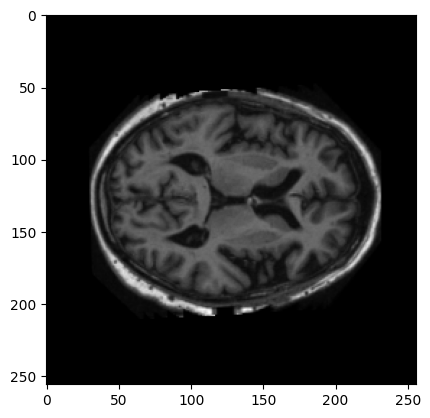

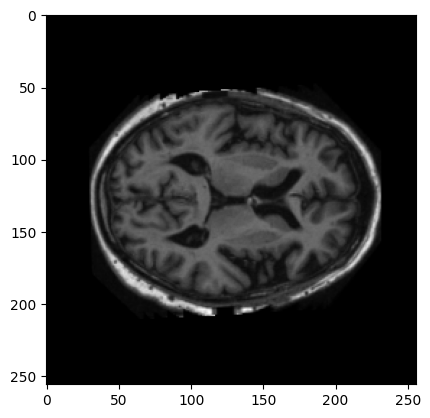

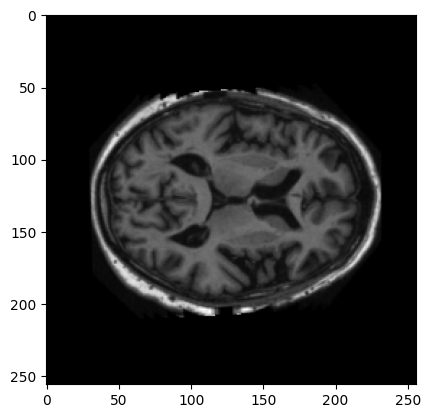

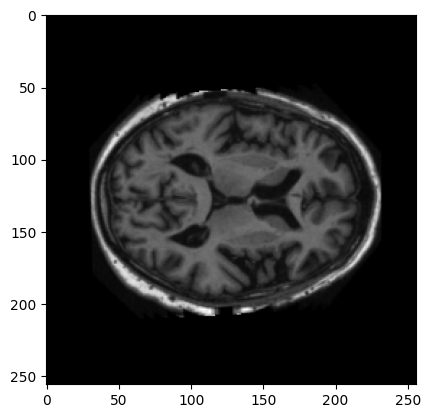

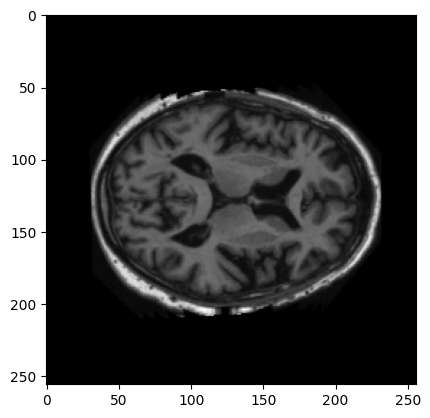

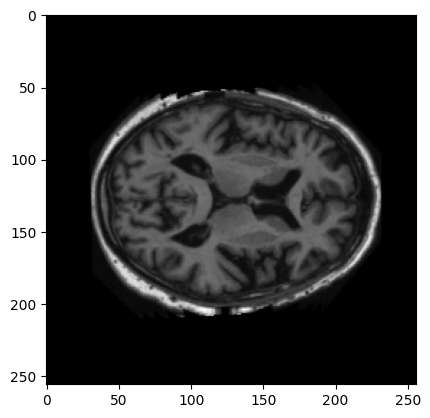

In [9]:

image_paths = []
for set in set_names:
    for filename in glob(f'./data/keras_png_slices_data/keras_png_slices_{set}/*', recursive=True):
        image_paths.append(filename)
        image_paths = sorted(image_paths)
        # print(image_paths)

im = Image.open(image_paths[0])
print(np.array(im))

for ip in image_paths[:10]:
  im = Image.open(ip)
  plt.figure()
  plt.imshow(im, cmap="gray")

(['./data/keras_png_slices_data/keras_png_slices_validate\\case_402_slice_0.nii.png',
  './data/keras_png_slices_data/keras_png_slices_validate\\case_402_slice_1.nii.png',
  './data/keras_png_slices_data/keras_png_slices_validate\\case_402_slice_10.nii.png',
  './data/keras_png_slices_data/keras_png_slices_validate\\case_402_slice_11.nii.png',
  './data/keras_png_slices_data/keras_png_slices_validate\\case_402_slice_12.nii.png',
  './data/keras_png_slices_data/keras_png_slices_validate\\case_402_slice_13.nii.png',
  './data/keras_png_slices_data/keras_png_slices_validate\\case_402_slice_14.nii.png',
  './data/keras_png_slices_data/keras_png_slices_validate\\case_402_slice_15.nii.png',
  './data/keras_png_slices_data/keras_png_slices_validate\\case_402_slice_16.nii.png',
  './data/keras_png_slices_data/keras_png_slices_validate\\case_402_slice_17.nii.png',
  './data/keras_png_slices_data/keras_png_slices_validate\\case_402_slice_18.nii.png',
  './data/keras_png_slices_data/keras_png_sli

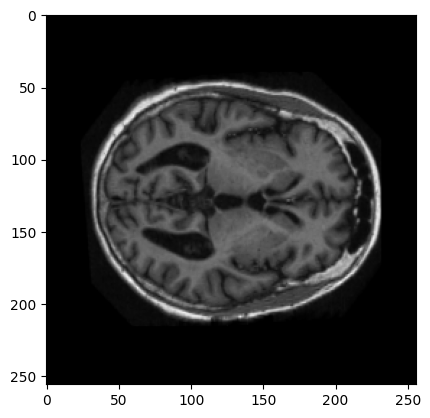

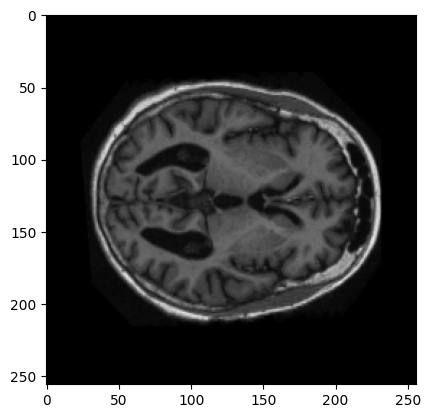

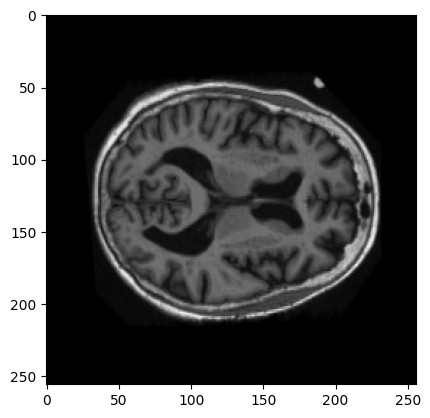

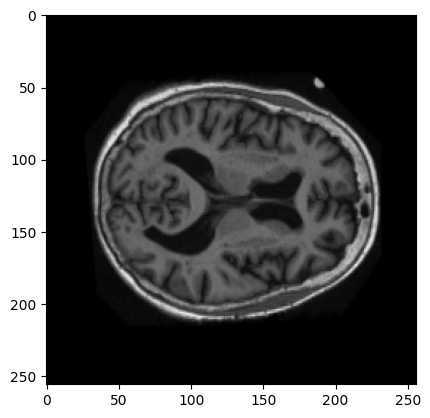

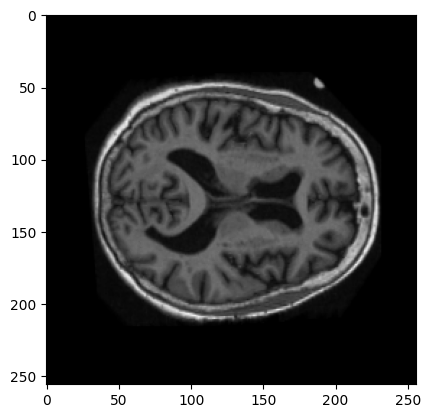

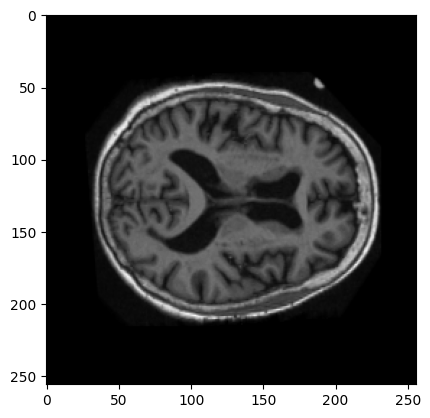

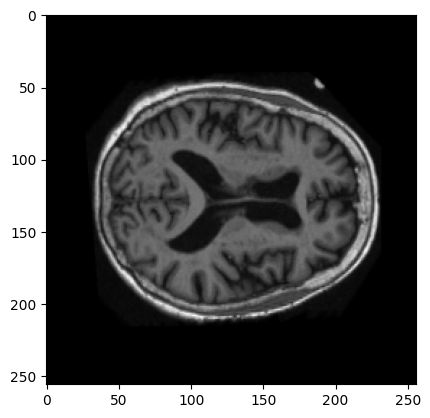

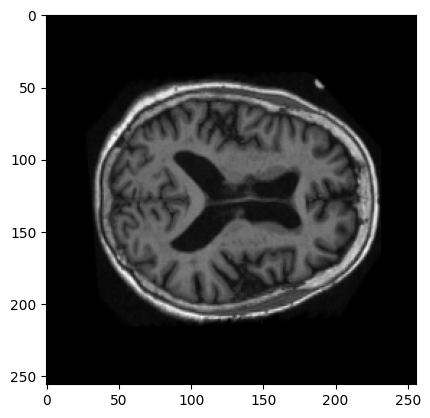

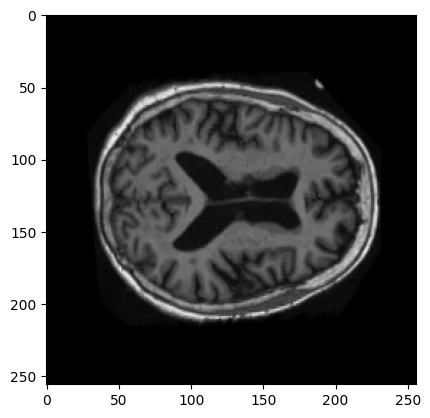

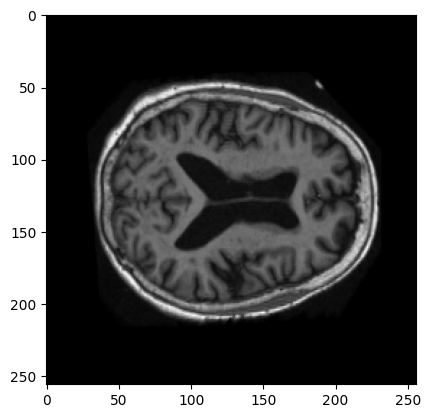

In [25]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Resize, Normalize
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import numpy as np


standardTransform = Compose([ToTensor(), Resize([64, 64]), Normalize(0.5, 0.5 ,0.5)])

# class OASISDataset(Dataset):
#     def __init__(self, img_dir, transform):
#         self.x = sc.fit_transform(x)
#         self.y = y
        
#         self.x = torch.tensor(x, dtype=torch.float64)
#         self.y = torch.tensor(y)
        
        
#     def __len__(self):
#         return len(self.y)
    
#     def __getitem__(self, idx):
#         return self.x[idx], self.y[idx]
    

def load_images_from_directories(dirs):
  """Load images from data directory

  Args:
      dirs (_type_): _description_
  """
  image_paths = []
  images = []
  for dir in dirs:
      for filename in glob(dir, recursive=True):
          image_paths.append(filename)
          images.append(np.array(Image.open(filename)))
  image_paths = sorted(image_paths)
  
  
  for ip in image_paths[:10]:
    im = Image.open(ip)
    plt.figure()
    plt.imshow(im, cmap="gray")
  
  return image_paths, images


def load_oasis_images():
  """Load oasis images from data directory provided
  
  Returns:
      _type_: _description_
  """
  dataset_names = ["test", "validate", "test"]
  dirs = []
  
  for dataset in dataset_names:
    dirs.append(f'./data/keras_png_slices_data/keras_png_slices_{dataset}/*')
    
  return load_images_from_directories(dirs)

load_images_from_directories(["./data/keras_png_slices_data/keras_png_slices_validate/*"])

In [ ]:
class OASISDataset(Dataset):
    def __init__(self, img_list, transform):
        self.x = transform()
        
        self.x = torch.tensor(x, dtype=torch.float64)
        self.y = torch.tensor(y)
    
    
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        
        return self.x[idx], self.y[idx]

In [5]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Resize, Normalize
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import numpy as np


standardTransform = Compose([ToTensor(), Resize([128, 128]), Normalize(0.5, 0.5 ,0.5)])

class OASISDataset(Dataset):
    def __init__(self, img_data, transform=ToTensor()):
        self.imgs = img_data
        self.transform = transform
        
    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, idx):
        return self.transform(self.imgs[idx])

def load_images_from_directories(dirs, verbose=False):
  """Load images from data directory

  Args:
      dirs (_type_): _description_
  """
  image_paths = []
  images = []
  for dir in dirs:
      for filename in glob(dir, recursive=True):
          image_paths.append(filename)
          images.append(Image.open(filename))
  image_paths = sorted(image_paths)
  
  if verbose:
    for ip in image_paths[:10]:
        im = Image.open(ip)
        plt.figure()
        plt.imshow(im, cmap="gray")
  
  return image_paths, images


def load_oasis_images(verbose=False):
  """Load oasis images from data directory provided
  
  Returns:
      [string, list[np.array]]: image paths and images
  """
  dataset_names = ["test", "validate", "test"]
  dirs = []
  
  for dataset in dataset_names:
    dirs.append(f'./data/keras_png_slices_data/keras_png_slices_{dataset}/*')
    
  return load_images_from_directories(dirs, verbose)

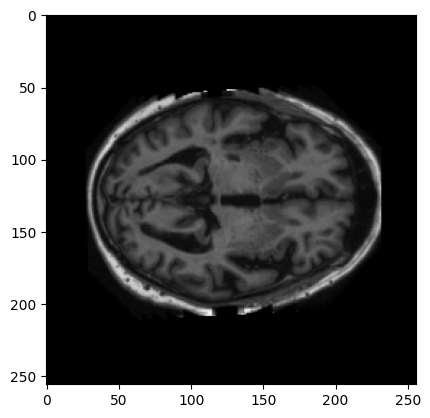

In [7]:
paths, imgs = load_oasis_images(verbose = False)
# dataset = OASISDataset(imgs, standardTransform)
plt.imshow(imgs[0], cmap = 'gray')
# convert img to PIL image
# imgs[0] = Image.fromarray(imgs[0])
# print(imgs[0])

In [8]:
dataset = OASISDataset(imgs, standardTransform)

In [9]:
dl = DataLoader(dataset=dataset)
nextimg = next(iter(dl))
print(nextimg)

tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]])


C:\Users\Jun Khai\AppData\Roaming\Python\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
